In [47]:
#Load the dataset
import pandas as pd

data = pd.read_csv('Data.csv')


In [48]:
#data.head(): Display the first few rows to understand the layout and values.

data.head()


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [51]:
#data.info(): Review the data types, non-null counts, and general structure of each column.

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [52]:
#From the data.info() output, we observe
#There are 44 columns with mixed data types (numerical, categorical, and binary variables in object type)
#No missing values in the dataset

In [4]:
#data.describe(): Provide basic statistics on numerical columns to get a sense of distributions
data.describe()


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [ ]:
# From data.describe(), we see:
# Summary statistics for numerical columns (mean, std, min, max, etc.).


In [53]:
#Convert Binary Categorical Columns to Integers
binary_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
    'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
    'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'
]

for col in binary_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)


In [54]:
#Check unique values in key categorical columns like make, segment, fuel_type, transmission_type, and rear_brakes_type to ensure they have expected, consistent values.
print(data['make'].unique())
print(data['segment'].unique())
print(data['fuel_type'].unique())
print(data['transmission_type'].unique())
print(data['rear_brakes_type'].unique())


[1 2 3 4 5]
['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
['CNG' 'Petrol' 'Diesel']
['Manual' 'Automatic']
['Drum' 'Disc']


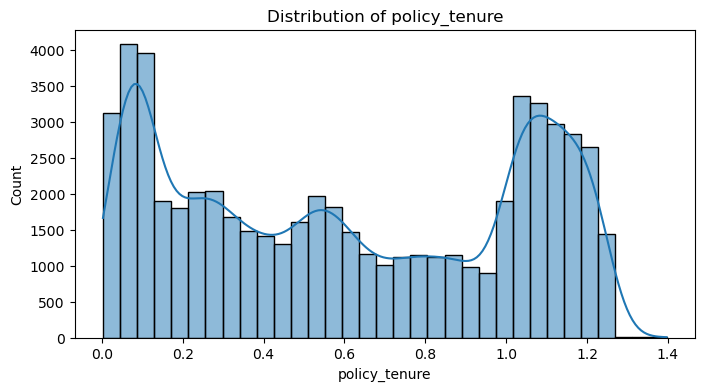

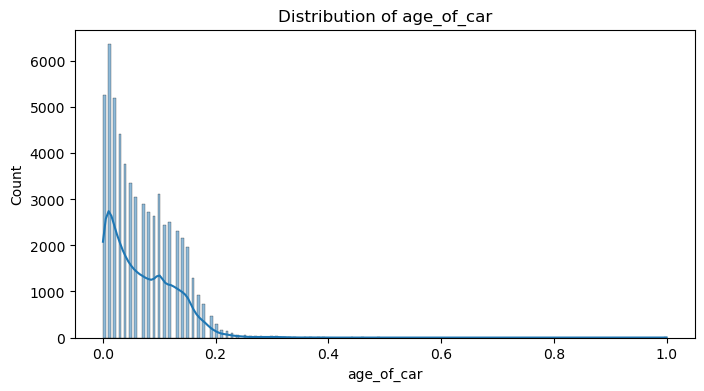

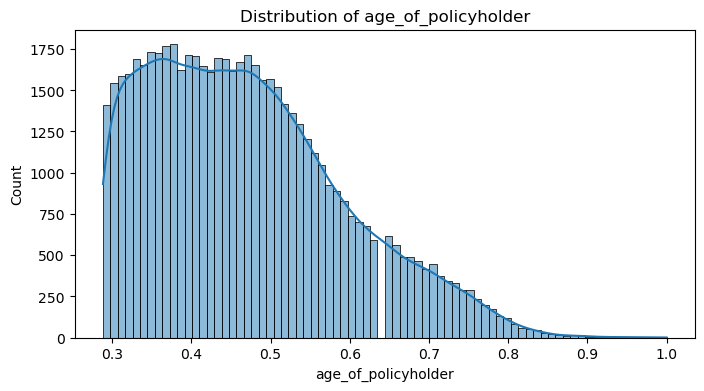

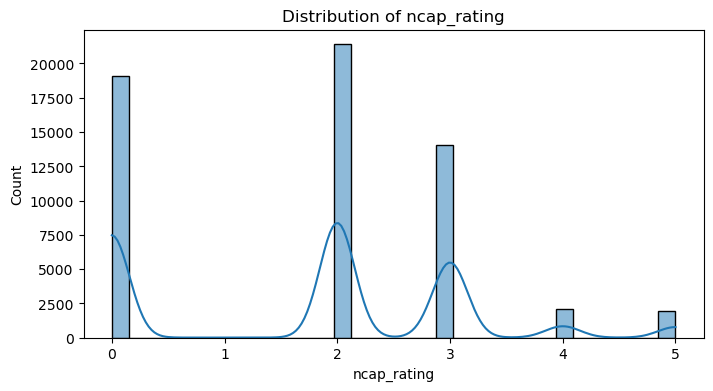

In [7]:
#Distribution Analysis to understand their ranges and typical values
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for key continuous variables
continuous_vars = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'ncap_rating']
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


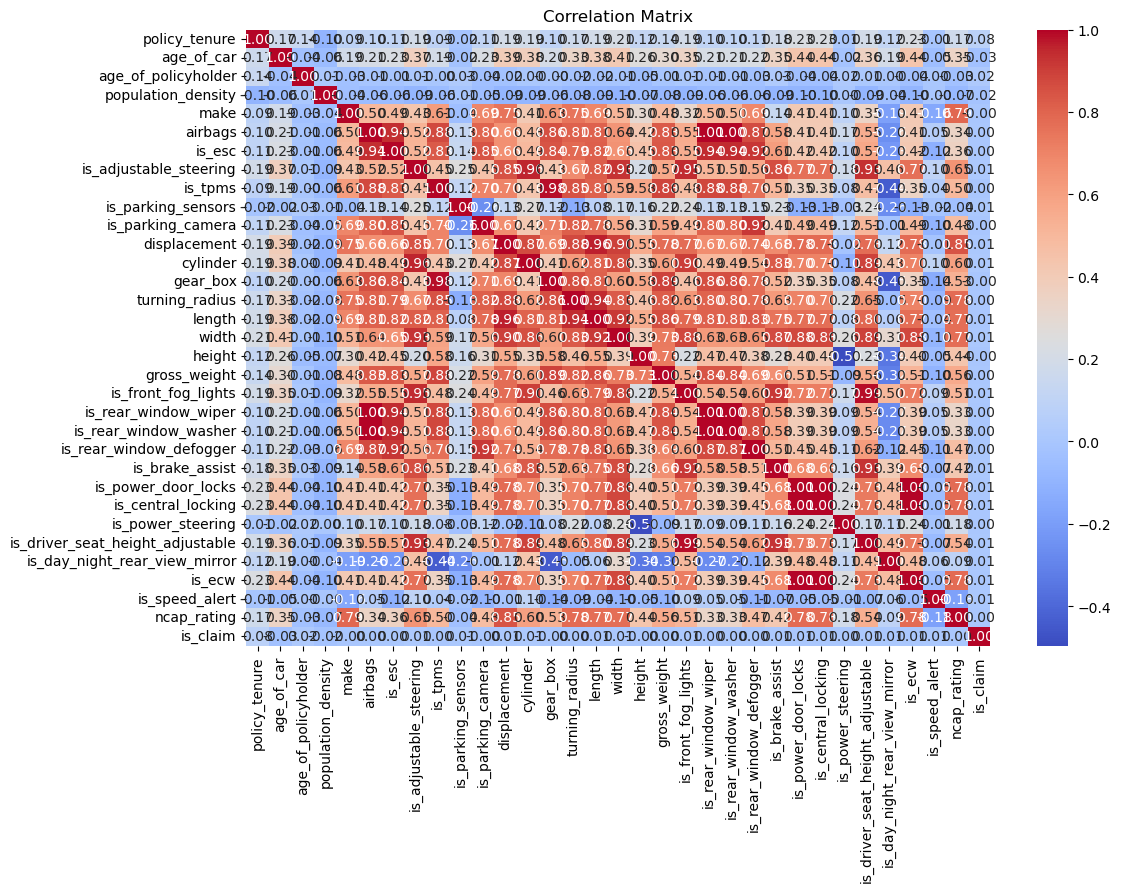

In [10]:
#Correlation Analysis to correlate among numerical variables, focusing on their relationship with is_claim (the target variable)
# Select only the numeric columns for correlation analysis.
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


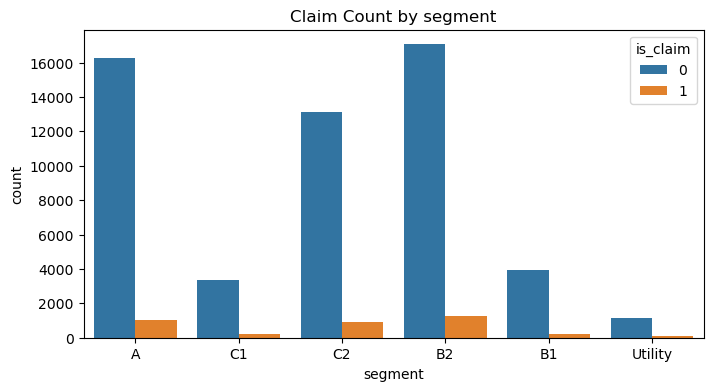

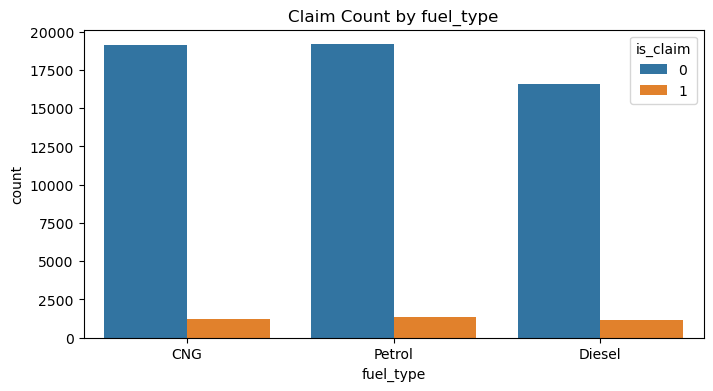

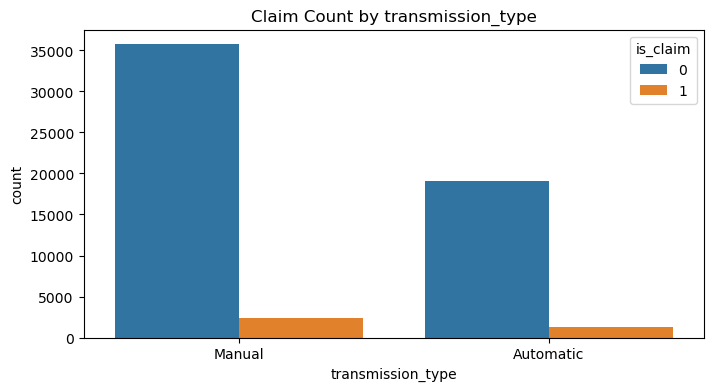

In [9]:
# Categorical Analysis - To know relationship between categorical variables and the target variable is_claim
for cat_var in ['segment', 'fuel_type', 'transmission_type']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=cat_var, hue='is_claim')
    plt.title(f'Claim Count by {cat_var}')
    plt.show()


In [11]:
data['car_age_policyholder_age_ratio'] = data['age_of_car'] / data['age_of_policyholder']


In [12]:
data['population_density_category'] = pd.cut(data['population_density'], bins=3, labels=['Low', 'Medium', 'High'])


In [13]:
safety_features = ['is_esc', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_brake_assist', 'is_ecw', 'is_speed_alert']
data['safety_features_count'] = data[safety_features].sum(axis=1)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_vars = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'displacement', 'turning_radius', 'length', 'width', 'height', 'gross_weight']
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])


In [15]:
data = pd.get_dummies(data, columns=['segment', 'fuel_type', 'transmission_type', 'population_density_category'], drop_first=True)


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['policy_id', 'is_claim'])  # Features
y = data['is_claim']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)


In [19]:
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index(['area_cluster', 'model', 'max_torque', 'max_power', 'engine_type',
       'rear_brakes_type', 'steering_type'],
      dtype='object')


In [20]:
categorical_columns = ['area_cluster', 'model', 'max_torque', 'max_power', 'engine_type', 'rear_brakes_type', 'steering_type']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [22]:
# Identify non-numeric columns again
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns before encoding:", non_numeric_columns)

# Apply one-hot encoding to all non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)


Non-numeric columns before encoding: Index([], dtype='object')


In [23]:
print("Data types after encoding:")
print(X.dtypes.value_counts())  # Check if there are still any object types


Data types after encoding:
bool       70
int64      24
float64    10
Name: count, dtype: int64


In [27]:
for col in X_train.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:", X_train[col].unique())


Unique values in area_cluster: ['C12' 'C3' 'C19' 'C2' 'C9' 'C13' 'C8' 'C1' 'C16' 'C10' 'C5' 'C14' 'C15'
 'C4' 'C7' 'C11' 'C17' 'C22' 'C6' 'C21' 'C18' 'C20']
Unique values in model: ['M6' 'M1' 'M4' 'M8' 'M7' 'M3' 'M9' 'M2' 'M10' 'M5' 'M11']
Unique values in max_torque: ['113Nm@4400rpm' '60Nm@3500rpm' '250Nm@2750rpm' '82.1Nm@3400rpm'
 '91Nm@4250rpm' '200Nm@1750rpm' '85Nm@3000rpm' '200Nm@3000rpm'
 '170Nm@4000rpm']
Unique values in max_power: ['88.50bhp@6000rpm' '40.36bhp@6000rpm' '113.45bhp@4000rpm'
 '55.92bhp@5300rpm' '67.06bhp@5500rpm' '97.89bhp@3600rpm'
 '61.68bhp@6000rpm' '88.77bhp@4000rpm' '118.36bhp@5500rpm']
Unique values in engine_type: ['K Series Dual jet' 'F8D Petrol Engine' '1.5 L U2 CRDi' 'K10C'
 '1.2 L K Series Engine' '1.0 SCe' 'i-DTEC' '1.2 L K12N Dualjet' 'G12B'
 '1.5 Turbocharged Revotorq' '1.5 Turbocharged Revotron']
Unique values in rear_brakes_type: ['Drum' 'Disc']
Unique values in steering_type: ['Electric' 'Power' 'Manual']


In [28]:
# Extract numerical values from 'max_torque'
data['max_torque_value'] = data['max_torque'].str.extract('(\d+\.?\d*)').astype(float)

# Extract numerical values from 'max_power'
data['max_power_value'] = data['max_power'].str.extract('(\d+\.?\d*)').astype(float)


In [29]:
data = data.drop(columns=['max_torque', 'max_power'])


In [30]:
categorical_columns = ['area_cluster', 'model', 'engine_type', 'rear_brakes_type', 'steering_type']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [31]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['policy_id', 'is_claim'])  # Features
y = data['is_claim']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression - Recall:", recall_score(y_test, y_pred_log_reg))
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_log_reg))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf))

# Gradient Boosting Evaluation
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting - Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting - F1 Score:", f1_score(y_test, y_pred_gb))


Logistic Regression - Accuracy: 0.9354893762266405
Logistic Regression - Recall: 0.0
Logistic Regression - F1 Score: 0.0
Random Forest - Accuracy: 0.9278948715760731
Random Forest - Recall: 0.013227513227513227
Random Forest - F1 Score: 0.023121387283236993
Gradient Boosting - Accuracy: 0.9352333816878573
Gradient Boosting - Recall: 0.0
Gradient Boosting - F1 Score: 0.0


In [38]:
from sklearn.utils import resample

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['is_claim'] == 0]
minority_class = train_data[train_data['is_claim'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, 
                              replace=True,               # Sample with replacement
                              n_samples=len(majority_class),  # Match majority class size
                              random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Separate features and target variable
X_train_resampled = upsampled_data.drop('is_claim', axis=1)
y_train_resampled = upsampled_data['is_claim']


In [39]:
# Downsample the majority class
majority_downsampled = resample(majority_class, 
                                replace=False,                # Sample without replacement
                                n_samples=len(minority_class),  # Match minority class size
                                random_state=42)

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([majority_downsampled, minority_class])

# Separate features and target variable
X_train_resampled = downsampled_data.drop('is_claim', axis=1)
y_train_resampled = downsampled_data['is_claim']


In [40]:
# Initialize models with balanced class weights
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Gradient Boosting doesn’t support class weights directly


In [41]:
# Train the models on resampled data or with class weights
log_reg.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)
gb.fit(X_train_resampled, y_train_resampled)

# Evaluate the models
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression - Recall:", recall_score(y_test, y_pred_log_reg))
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_log_reg))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf))

# Gradient Boosting Evaluation
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting - Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting - F1 Score:", f1_score(y_test, y_pred_gb))


Logistic Regression - Accuracy: 0.5547401655431351
Logistic Regression - Recall: 0.5753968253968254
Logistic Regression - F1 Score: 0.14290407358738502
Random Forest - Accuracy: 0.5811929345507296
Random Forest - Recall: 0.5476190476190477
Random Forest - F1 Score: 0.14435146443514643
Gradient Boosting - Accuracy: 0.5355405751343971
Gradient Boosting - Recall: 0.705026455026455
Gradient Boosting - F1 Score: 0.1637732370563835


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring='recall', cv=3)
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Best Model - Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model - Recall:", recall_score(y_test, y_pred_best))
print("Best Model - F1 Score:", f1_score(y_test, y_pred_best))


Best Model - Accuracy: 0.49441078590323406
Best Model - Recall: 0.7513227513227513
Best Model - F1 Score: 0.1608837275173488


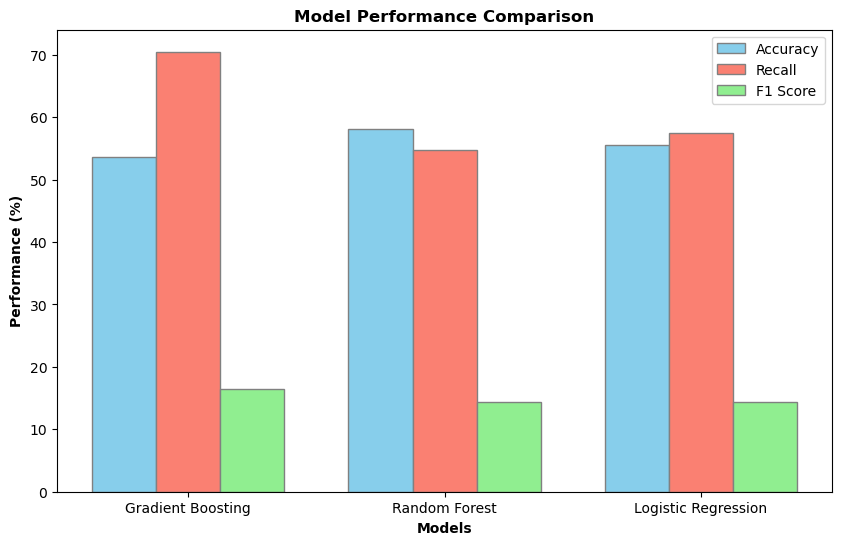

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding performance metrics
models = ['Gradient Boosting', 'Random Forest', 'Logistic Regression']
accuracy = [53.6, 58.1, 55.5]
recall = [70.5, 54.8, 57.5]
f1_score = [16.4, 14.4, 14.3]

# Set up the bar width and positions
bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='skyblue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, recall, color='salmon', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='lightgreen', width=bar_width, edgecolor='grey', label='F1 Score')

# Adding labels and titles
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Performance (%)', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Adding the legend
plt.legend()

# Show the plot
plt.show()


In [43]:
import pickle

# Save the best model to a file
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [44]:
import pickle

# After training the model
with open('gradient_boosting_model_v2.pkl', 'wb') as file:
    pickle.dump(best_model, file)
